## Wrangle file for Zillow's 2017 Property Information

In [94]:
import wrangle as wr

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [65]:
zillow = wr.get_zillow_data()
zillow.head(15)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
5,0.0,0.0,NaN,124.0,NaN,NaN,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
8,0.0,0.0,NaN,6730242.0,NaN,80348.13,6037.0
9,0.0,0.0,NaN,15532.0,NaN,248.89,6037.0


In [66]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


In [67]:
zillow.shape

(2152863, 7)

In [68]:
zillow.value_counts().sum()

2140235

In [69]:
zillow = zillow.rename(columns = {'bedroomcnt': 'bedrooms',
                                 'bathroomcnt': 'bathrooms',
                                 'calculatedfinishedsquarefeet': 'sqft',
                                 'taxvaluedollarcnt': 'tax_value',
                                 'taxamount': 'tax_amount',
                                 'yearbuilt': 'year_built'})

In [70]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathrooms,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
sqft,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
tax_value,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
year_built,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
tax_amount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


#### Acquire and Summarize Takeaways
- Over 2M rows
- All data types are float but most should be int
- Many nulls

In [71]:
zillow.isnull().any()

bedrooms       True
bathrooms      True
sqft           True
tax_value      True
year_built     True
tax_amount     True
fips          False
dtype: bool

In [72]:
zillow.isnull().sum()

bedrooms        11
bathrooms       11
sqft          8484
tax_value      493
year_built    9337
tax_amount    4442
fips             0
dtype: int64

In [73]:
zillow.columns[zillow.isnull().any()]

Index(['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'year_built',
       'tax_amount'],
      dtype='object')

In [74]:
zillow.bedrooms.value_counts(dropna=False, ascending=True)

25.0         1
16.0         2
18.0         3
15.0         6
14.0         7
NaN         11
12.0        12
13.0        16
11.0        34
10.0       121
9.0        291
8.0       1107
7.0       4807
0.0      13187
1.0      23166
6.0      25166
5.0     150866
2.0     335473
4.0     634289
3.0     964298
Name: bedrooms, dtype: int64

In [75]:
zillow.bathrooms.value_counts(dropna=False, ascending=True)

19.50         1
32.00         1
14.50         1
19.00         1
11.50         3
1.75          3
12.50         3
17.00         4
20.00         6
18.00         8
NaN          11
16.00        12
10.50        14
0.50         16
15.00        17
14.00        25
13.00        39
9.50         50
12.00        73
8.50        110
11.00       146
10.00       325
7.50        384
9.00        713
6.50       1333
8.00       1692
7.00       4394
5.50       6217
6.00      10747
0.00      13027
4.50      19506
5.00      28362
3.50      28518
1.50      31211
4.00      82155
2.50     142981
1.00     414324
3.00     422841
2.00     943589
Name: bathrooms, dtype: int64

In [76]:
# Dropping the null values
zillow = zillow.dropna()
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   sqft        float64
 3   tax_value   float64
 4   year_built  float64
 5   tax_amount  float64
 6   fips        float64
dtypes: float64(7)
memory usage: 130.6 MB


In [77]:
zillow.isnull().sum()

bedrooms      0
bathrooms     0
sqft          0
tax_value     0
year_built    0
tax_amount    0
fips          0
dtype: int64

In [78]:
zillow.shape

(2140235, 7)

In [80]:
# Change bedroom count, year built, calculated finished squarefeet, and fips value type to int
zillow.bedrooms = zillow.bedrooms.astype('int64')
zillow.sqft = zillow.sqft.astype('int64')
zillow.year_built = zillow.year_built.astype('int64')
zillow.fips = zillow.fips.astype('int64')

zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    int64  
 1   bathrooms   float64
 2   sqft        int64  
 3   tax_value   float64
 4   year_built  int64  
 5   tax_amount  float64
 6   fips        int64  
dtypes: float64(3), int64(4)
memory usage: 130.6 MB


In [85]:
zillow.bedrooms.value_counts()

3     962944
4     633608
2     334221
5     150671
6      25117
1      22895
7       4792
0       4397
8       1103
9        290
10       118
11        34
13        15
12        12
14         7
15         5
18         3
16         2
25         1
Name: bedrooms, dtype: int64

In [86]:
zillow.bathrooms.value_counts()

2.00     942463
3.00     422398
1.00     412582
2.50     142827
4.00      82039
1.50      31157
3.50      28464
5.00      28306
4.50      19474
6.00      10717
5.50       6201
7.00       4381
0.00       4274
8.00       1681
6.50       1330
9.00        707
7.50        382
10.00       322
11.00       145
8.50        108
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
14.50         1
32.00         1
19.50         1
19.00         1
Name: bathrooms, dtype: int64

In [88]:
zillow.tax_value.value_counts()

450000.0     820
500000.0     774
400000.0     723
430000.0     690
440000.0     683
            ... 
1210005.0      1
238757.0       1
1082111.0      1
1216800.0      1
1436013.0      1
Name: tax_value, Length: 588178, dtype: int64

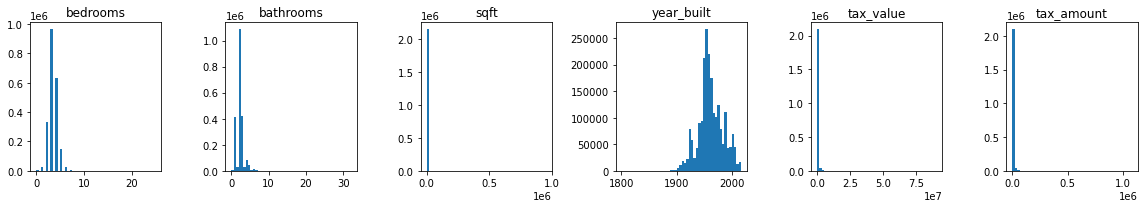

In [93]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'sqft', 'year_built', 'tax_value', 'tax_amount']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    zillow[col].hist(bins=50)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
    # mitigate overlap
    plt.tight_layout()

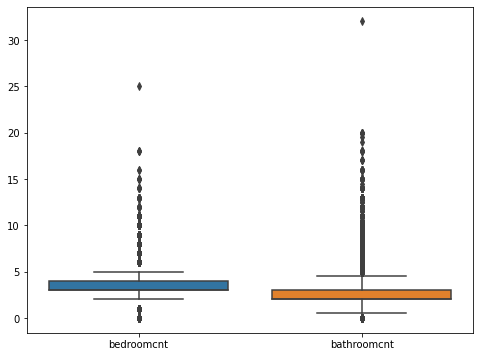

In [37]:
plt.figure(figsize=(8,6))

sns.boxplot(data=zillow.drop(columns=['fips', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount', 'yearbuilt']))
plt.show()

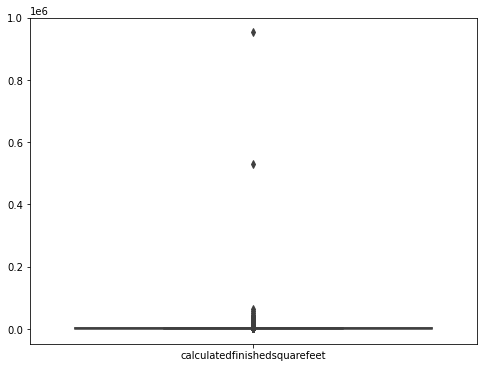

In [48]:
plt.figure(figsize=(8,6))

sns.boxplot(data=zillow.drop(columns=['fips', 'taxvaluedollarcnt', 'taxamount', 'yearbuilt', 'bedroomcnt', 'bathroomcnt']))
plt.show()

#### Findings:
- There are several outliers in each category that are skewing the data

#### Manually removing outliers

In [105]:
zillow.bathrooms <= 8

4          True
6          True
7          True
11         True
14         True
           ... 
2152856    True
2152858    True
2152859    True
2152861    True
2152862    True
Name: bathrooms, Length: 2140235, dtype: bool

In [114]:
zillow_noutliers = zillow[(zillow.bathrooms <= 8) & (zillow.bathrooms >= 1)]

In [119]:
zillow_noutliers = zillow_noutliers[(zillow_noutliers.bathrooms != 7.50) & (zillow_noutliers.bathrooms != 1.75)]

In [120]:
zillow_noutliers.bathrooms.value_counts()

2.0    942463
3.0    422398
1.0    412582
2.5    142827
4.0     82039
1.5     31157
3.5     28464
5.0     28306
4.5     19474
6.0     10717
5.5      6201
7.0      4381
8.0      1681
6.5      1330
Name: bathrooms, dtype: int64

In [121]:
zillow_noutliers.bedrooms.value_counts()

3     962615
4     633286
2     334046
5     150325
6      24528
1      22725
7       4306
0       1033
8        855
9        202
10        66
11        16
12         6
13         5
14         3
15         2
16         1
Name: bedrooms, dtype: int64

In [122]:
zillow_noutliers.bedrooms = zillow_noutliers.bedrooms[zillow_noutliers.bedrooms < 9]

In [123]:
zillow_noutliers.bedrooms.value_counts()

3.0    962615
4.0    633286
2.0    334046
5.0    150325
6.0     24528
1.0     22725
7.0      4306
0.0      1033
8.0       855
Name: bedrooms, dtype: int64

In [126]:
zillow_noutliers.sqft.value_counts()

1200     5170
1080     4370
1120     4346
1400     3828
1440     3675
         ... 
13632       1
9538        1
179         1
9549        1
8480        1
Name: sqft, Length: 9554, dtype: int64

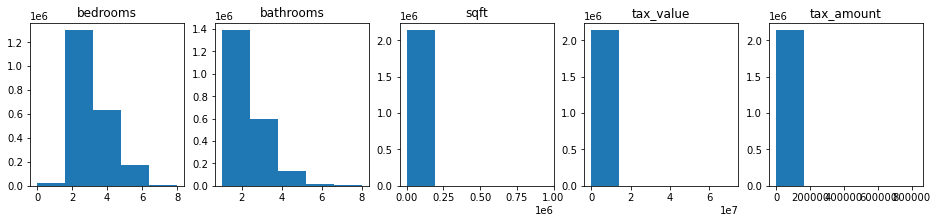

In [125]:
plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in zillow_noutliers.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    zillow_noutliers[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)

#### Removing outliers using quantile

In [127]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    int64  
 1   bathrooms   float64
 2   sqft        int64  
 3   tax_value   float64
 4   year_built  int64  
 5   tax_amount  float64
 6   fips        int64  
dtypes: float64(3), int64(4)
memory usage: 130.6 MB


In [183]:

def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.1, .9])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [184]:
zillow_df = remove_outliers(zillow, 1.5, ['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'tax_amount'])
zillow_df.shape

(2077242, 7)

In [185]:
zillow_df.bathrooms.value_counts()

2.00    939241
3.00    414129
1.00    411864
2.50    141978
4.00     71763
1.50     31102
3.50     26280
5.00     18496
4.50     15462
0.00      4077
5.50      2834
0.50        13
1.75         3
Name: bathrooms, dtype: int64

In [186]:
zillow_df.bedrooms.value_counts()

3    953234
4    615627
2    331910
5    131726
1     22681
6     17878
0      4186
Name: bedrooms, dtype: int64

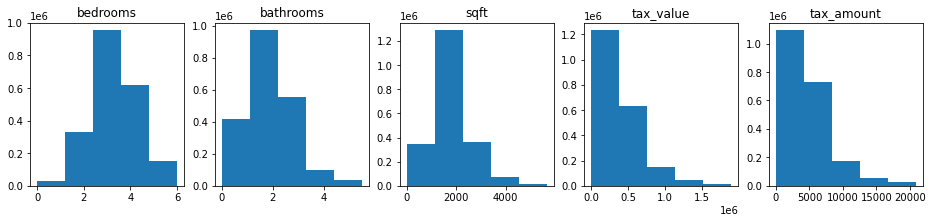

In [187]:
plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in zillow_noutliers.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    zillow_df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)

### Splitting the Data

In [102]:
x_train_and_validate, x_test = train_test_split(zillow.drop(columns=['fips']), random_state=123)
x_train, x_validate = train_test_split(x_train_and_validate)

### Scaling

Text(0.5, 1.0, 'Scaled')

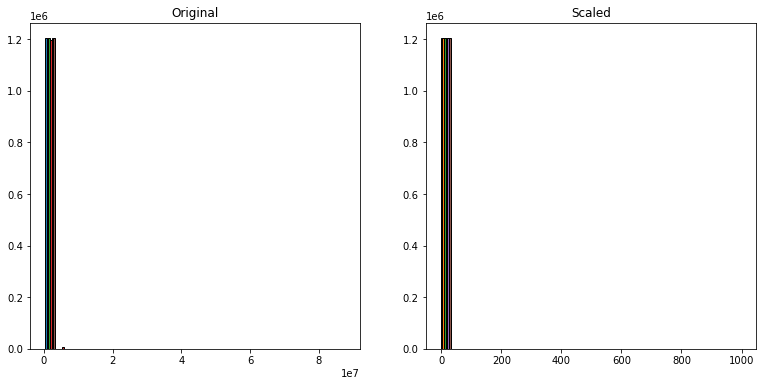

In [103]:
# Since I haven't removed outliers yet, I am going to use the Robust Scaler firt to see how it does. 
# It removes the outer quartiles before scaling so should work similar to removing outlieers then scaling. 

scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')